In [1]:
import pydicom as dcm
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2

In [65]:
base = "statement_1"
pass_dicom = 'IM_0003.dcm'
filename = dcm.data.data_manager.get_files(base, pass_dicom)[0]
print(filename)

statement_1\IM_0003.dcm


In [66]:
ds = dcm.dcmread(filename)
data = ds.pixel_array

In [67]:
data.shape

(117, 600, 800, 3)

RGB - 90 <br>
BGR - 113

In [68]:
dta =  cv2.cvtColor(data[0], cv2.COLOR_YCR_CB2RGB)
(thresh, bw_img) = cv2.threshold(dta, 30, 255, cv2.THRESH_BINARY)

In [69]:
bw_img.shape

(600, 800, 3)

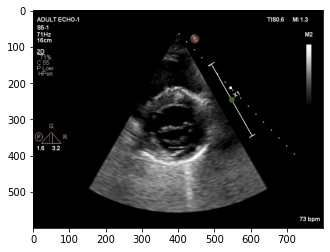

In [70]:
plt.imshow(dta)  # set the color map to bone
plt.show()

In [61]:
bw_img =  cv2.cvtColor(bw_img, cv2.COLOR_RGB2GRAY)

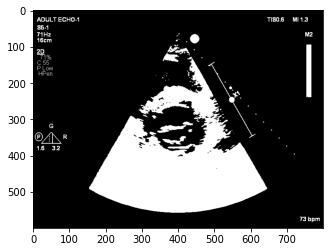

In [62]:
plt.imshow(bw_img)
plt.show()

In [34]:
cv2.imwrite('img.jpeg', bw_img)

True

In [35]:
text_nme = filename.replace('.dcm', '_inx.txt')

In [36]:
with open(text_nme, 'r') as fle:
    cors = fle.read()

def add(x):
    x = float(x)
    # x += 200
    return x

In [579]:
coors = [tuple(map(add, i.split(' '))) for i in cors.split('\n')[0:-1]]

In [580]:
xs = []
ys = []
from tqdm import tqdm
for x, y in tqdm(coors):
    xs.append(x)
    ys.append(y)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<?, ?it/s]


In [581]:
ctr = np.array(coors).reshape((-1,1,2)).astype(np.int32)

In [525]:
edged = cv2.Canny(bw_img, 30, 200)
contours = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [77]:
videos = {}
plt.set_cmap('gray')

import pydicom
def read_image(path, num=0):
    global videos
    if len(videos) == 0:
        im = pydicom.dcmread(path)
        im = im.pixel_array
        videos[path] = im
    else:
        im = videos[path]
    if im.ndim == 4:    #  it is a video of frames for ultrasound images (RGB for each pixel)
        im = im[num]  # First frame of the video
    if im.ndim == 3:       # if it is a color image
        # im = cv2.cvtColor(im, cv2.COLOR_YCR_CB2RGB)
        im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    r, c = im.shape[:2]
    if r > c:
        nr, nc = 256, int(c/r*256)
    else:
        nr, nc = int(r/c*256), 256

    im = cv2.resize(im, (nc, nr))
    im = (im - im.min()) / (np.max(im)-np.min(im))
    im = np.uint8(im * 255)
    image = np.zeros(shape=(256, 256))
    image[:im.shape[0],:im.shape[1]] = im.copy()
    # image = image / (np.max(image))
    return image

dta = read_image(filename, 0)

<Figure size 432x288 with 0 Axes>

In [78]:
crop = 30
scale = 5

# dta = cv2.cvtColor(dta, cv2.COLOR_RGB2GRAY)
# dta = cv2.resize(dta, (256,256))
# dta = np.zeros(shape=(256, 256))
# dta[:dta.shape[0],:dta.shape[1]] = dta.copy()
dta = dta[crop:-crop,crop:-crop]
print(dta.shape)

(196, 196)


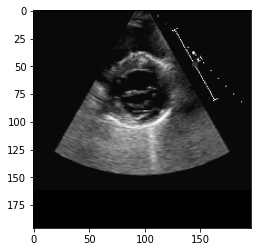

In [79]:
plt.imshow(dta)

In [80]:
ctr.shape

(90, 2)

In [81]:
ctr = np.loadtxt(text_nme)
ctr = ctr.astype(int)
ctr = np.array(ctr)
og_ctr = ctr.copy()
ctr[:,0] -= crop
ctr[:,1] -= crop
ctr = scale * ctr

In [82]:
# for contour in ctr:
# for cnt in contours:
#     cv2.drawContours(dta,[cnt],0,(255,255,255),2)
dim = dta.shape
dta = cv2.resize(dta, dsize=(int(scale*dim[1]), int(scale*dim[0])))
# cv2.drawContours(dta, [ctr], -1, (0, 255, 0), 3)


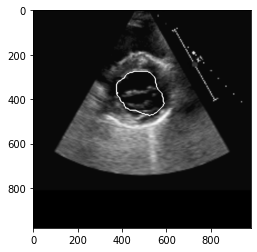

In [83]:
cv2.drawContours(dta, [ctr], -1, (255, 0, 0), 3)
plt.imshow(dta)
plt.show()